## Problem Statement

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- Service Provider Farm wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands.

## Business Goal:
- We need to design the model of demand for shared bikes with the available independent variables.
- It will be used by the management to understand how exactly the demands vary with different features.
- Accordingly, Company can manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- The model will be a good way for management to understand the demand dynamics of a new market. 
------------
- __Build a multiple linear regression model for the prediction of demand for shared bikes.__
- __cnt__ is target variable


## Data Dictionary
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

- Get rid of unwanted columns
- convert categorical column to categorical datatype
- Explore the data
- get one hot encoding or get dummies for categorical data
- split the data into train and test set
- scale the fetures including dependent columns
- draw th heat map with correlation on training data
- draw a scatter plot on most correlated data
- Divide training data to X and y
- Use RFE to reduce the columns 
- Use VIF and p value to reduce columns
- 

## Load required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load data
bike = pd.read_csv("day.csv")

In [5]:
bike.head(20)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        6           0   
1         2  02-01-2018       1   0     1        0        0           0   
2         3  03-01-2018       1   0     1        0        1           1   
3         4  04-01-2018       1   0     1        0        2           1   
4         5  05-01-2018       1   0     1        0        3           1   
5         6  06-01-2018       1   0     1        0        4           1   
6         7  07-01-2018       1   0     1        0        5           1   
7         8  08-01-2018       1   0     1        0        6           0   
8         9  09-01-2018       1   0     1        0        0           0   
9        10  10-01-2018       1   0     1        0        1           1   
10       11  11-01-2018       1   0     1        0        2           1   
11       12  12-01-2018       1   0     1        0        3           1   
12       13  13-01-2018       1   0     1        0        4           1   
13       14  14-01-2018       1   0     1        0        5           1   
14       15  15-01-2018       1   0     1        0        6           0   
15       16  16-01-2018       1   0     1        0        0           0   
16       17  17-01-2018       1   0     1        1        1           0   
17       18  18-01-2018       1   0     1        0        2           1   
18       19  19-01-2018       1   0     1        0        3           1   
19       20  20-01-2018       1   0     1        0        4           1   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   
15           1   9.498347  11.71085  48.3750  12.625011     251         953   
16           2   7.209153   8.83855  53.7500  12.999139     117         883   
17           2   8.883347  11.61665  86.1667   9.833925       9         674   
18           2  11.979134  14.92110  74.1739  13.957239      78        1572   
19           2  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Check null value in data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Total no of rows **730**.
- Total no of columns **16**.
- There is no Null values.

In [8]:
#Convert dtedat column to datetime format.
bike["dteday"] = pd.to_datetime(bike["dteday"])

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
#Check the unique values 
bike["instant"].unique()
# This is just another index, We can drop this columns

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

- 'dtedate' column also can be dropped.
- 'dtedate' is already been extraced to "yr and "month" column
- casual and registered columns does not add anything to target variable.Hence these can be dropped.


In [11]:
#Dropping instant and dtedate columns
bike.drop(columns=['instant','dteday','casual','registered'],inplace=True,axis=1)


In [12]:
#Check the rows and columns
bike.shape

(730, 12)

In [13]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [14]:
#Check Unique values in all categorical columns
print(f"season has values",bike.season.unique())
print(f"Month has values",bike.mnth.unique())
print(f"Holiday has values",bike.holiday.unique())
print(f"workingday has values",bike.workingday.unique())
print(f"weathersit has values",bike.weathersit.unique())

season has values [1 2 3 4]
Month has values [ 1  2  3  4  5  6  7  8  9 10 11 12]
Holiday has values [0 1]
workingday has values [0 1]
weathersit has values [2 1 3]


- ### Convert season, yr,mnth,holiday,weekday,workingday,weathersit column to categorical datatype.
- ### "cnt" is the target column

In [15]:
#Convert below columns to categorical datatype
bike[["season","yr","mnth","holiday","weekday","workingday","weathersit"]]=\
bike[["season","yr","mnth","holiday","weekday","workingday","weathersit"]].astype("category")

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.0 KB


In [17]:
bike.head()

season yr mnth holiday weekday workingday weathersit       temp     atemp  \
0      1  0    1       0       6          0          2  14.110847  18.18125   
1      1  0    1       0       0          0          2  14.902598  17.68695   
2      1  0    1       0       1          1          1   8.050924   9.47025   
3      1  0    1       0       2          1          1   8.200000  10.60610   
4      1  0    1       0       3          1          1   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

## Explore the Data

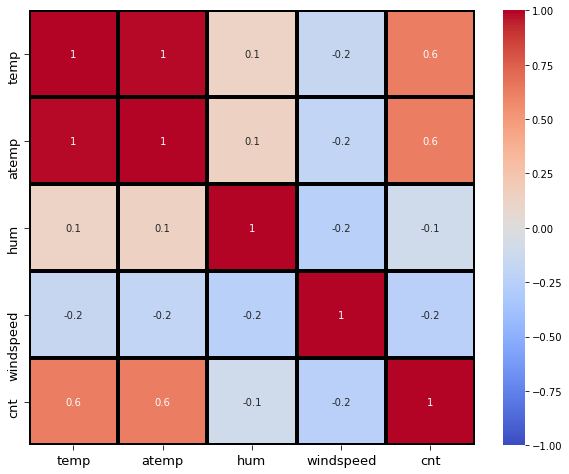

In [18]:
#Check the correlation 
plt.figure(figsize=(10,8)) #figure size
sns.heatmap(bike.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')
plt.tick_params(size=5,labelsize = 13) # plot ticks size

- `temp and atemp are highly positively correlated.`
- `we can drop any of the columns,Hence we are dropping atemp column.`


In [19]:
#Drop atemp column
bike.drop(columns=['atemp'],inplace=True)

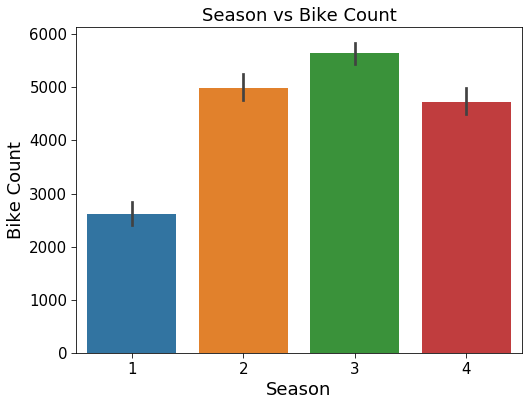

In [20]:
plt.figure(figsize=(8,6)) # figure size
sns.barplot(data=bike,x="season",y="cnt")  # Draw bar plot
plt.title("Season vs Bike Count",fontsize=18)  # plot title and size
plt.xlabel("Season",fontsize=18)  # X-axis Label
plt.ylabel("Bike Count",fontsize=18) # Y-axis label
plt.tick_params(size=5,labelsize = 15) # tick parameter size in X and Y axes
plt.show()

- __Season 3 ( Fall/Autumn) has highest no of bike share.__


In [21]:
def plot_bar_percentage(column_name,label):
    ''' plot percetages in bar plot
        column_name: categorical columns
        '''
    plt.figure(figsize=(8,6))
    #get Percentages 
    (bike.groupby(column_name)["cnt"].sum()/bike["cnt"].sum()).plot.bar(color="crimson")
    plt.title(f"{label} vs Bike Count ",fontsize=18) # title
    plt.xlabel(label,fontsize=18) # X-axis label
    plt.ylabel("Percentage",fontsize=18) # Y -axis Label
    plt.tick_params(size=5,labelsize = 13) 
    

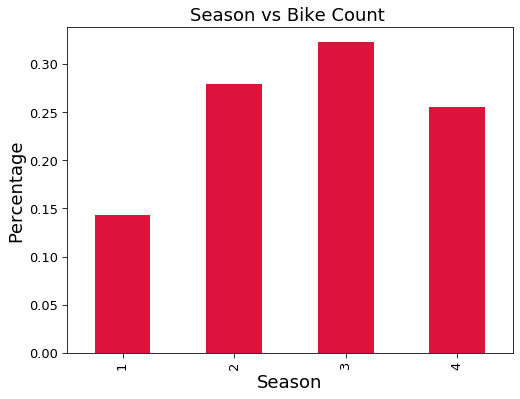

In [22]:
plot_bar_percentage("season","Season")

- __Most of the bike shared in season 3 i:e Fall or Autumn.__
- __Season 1 (Spring) has lowest bike share percetages.__

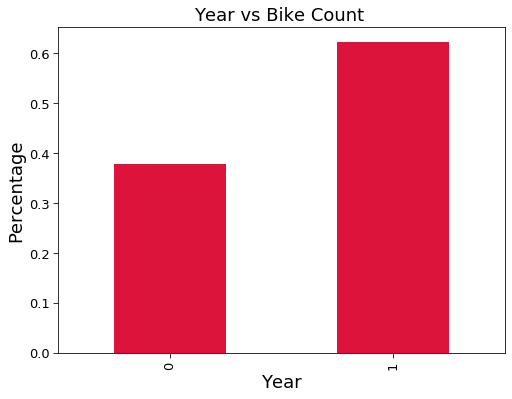

In [23]:
plot_bar_percentage("yr","Year")


-  __Year 1 i:e 2019 has more percenages of Bike Share.__
- __Year 0 i:e 2018 has less percetages of Bike Share.__

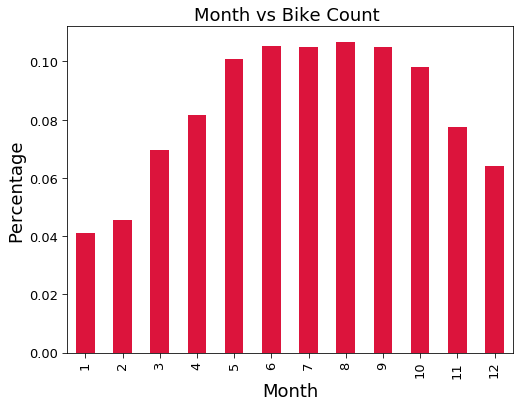

In [24]:
plot_bar_percentage("mnth","Month")

- __Between May to September close to 10% bikes are shared.__
- __JAN and FEB month has lowest percetage bikes are shared.__
- __Actual percetages can be seen below.__

In [25]:
#Percetages of bike share in each month
((bike.groupby("mnth")["cnt"].sum()/bike["cnt"].sum())*100).round(2)

mnth
1      4.10
2      4.54
3      6.96
4      8.18
5     10.08
6     10.52
7     10.48
8     10.67
9     10.51
10     9.80
11     7.74
12     6.41
Name: cnt, dtype: float64

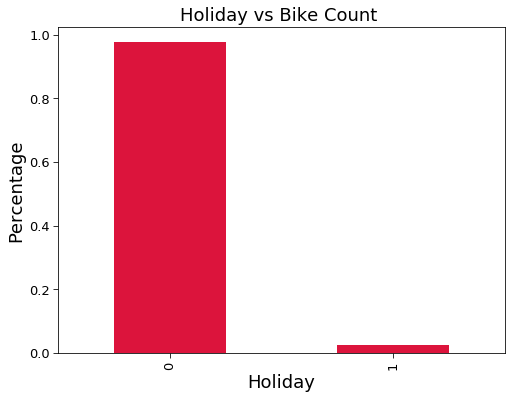

In [26]:
plot_bar_percentage("holiday","Holiday")

- __Non- Holday shows more percentages of bikes are shared.__

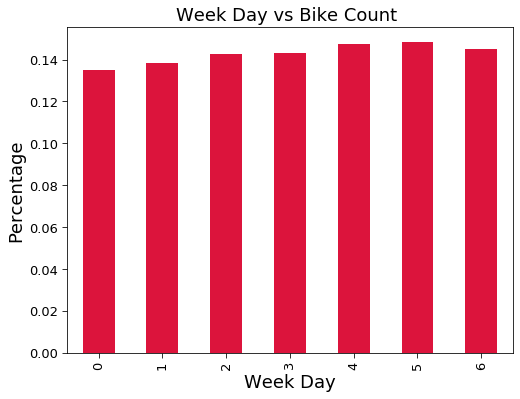

In [27]:
plot_bar_percentage("weekday","Week Day")

- __Each day of week 13-14% bikes are shared- which are alsmost in eqaul percetages.__

In [28]:
#Percetages of bike share in each day in a week
((bike.groupby("weekday")["cnt"].sum()/bike["cnt"].sum())*100).round(2)

weekday
0    13.49
1    13.84
2    14.25
3    14.32
4    14.75
5    14.82
6    14.52
Name: cnt, dtype: float64

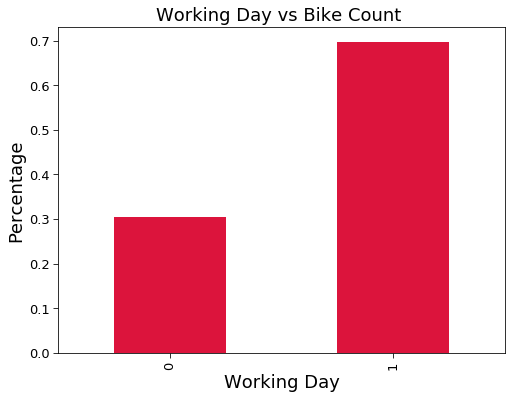

In [29]:
plot_bar_percentage("workingday","Working Day")

- __Working day has most percetages of bikes are shared.__

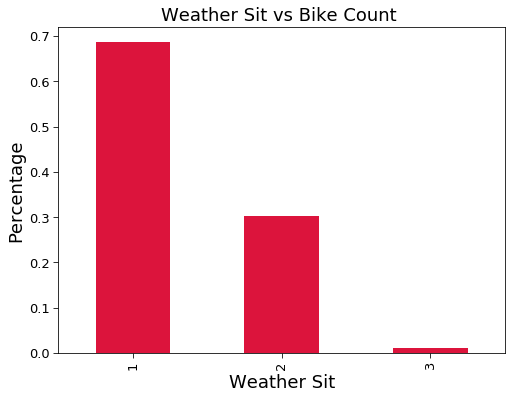

In [30]:
plot_bar_percentage("weathersit","Weather Sit")

- __Weather type 1 has most no of percentages of bike are share.__
- __Weather type 1 is: Clear, Few clouds, Partly cloudy, Partly cloudy.__

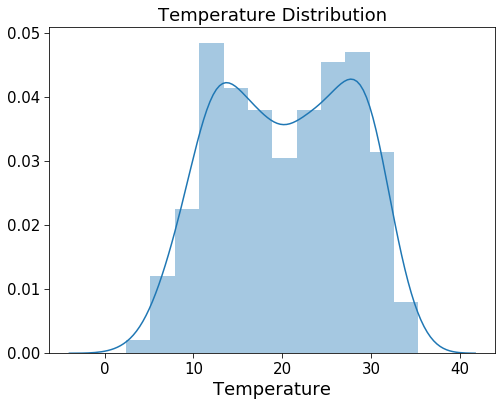

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(bike["temp"])
plt.title("Temperature Distribution",fontsize=18)
plt.xlabel("Temperature",fontsize=18)
# plt.ylabel("Bike Count",fontsize=18)
plt.tick_params(size=5,labelsize = 15)

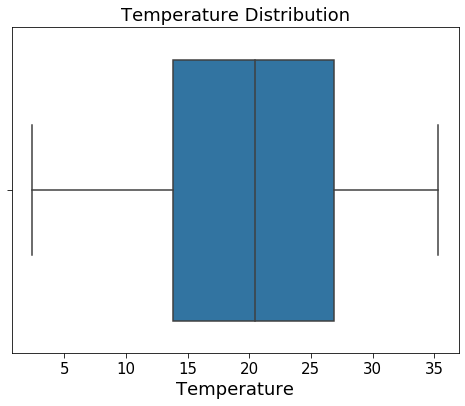

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(bike["temp"])
plt.title("Temperature Distribution",fontsize=18)
plt.xlabel("Temperature",fontsize=18)
# plt.ylabel("Bike Count",fontsize=18)
plt.tick_params(size=5,labelsize = 15)

In [33]:
# Convert Binning of Temperature to get the clear visibility with Temperature vs Bike Count
bike["temp_bin"] = pd.qcut(bike["temp"],q=3,labels=["low","medium","high"]) # Perform binning with 3 interval
bike.groupby("temp_bin")["cnt"].sum()/bike["cnt"].sum() # Calculate Percentage with each interval

temp_bin
low       0.215496
medium    0.369604
high      0.414900
Name: cnt, dtype: float64

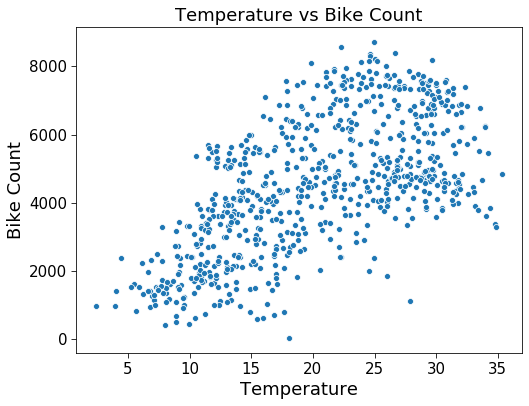

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp',y="cnt",data=bike)
plt.title("Temperature vs Bike Count",fontsize=18)
plt.xlabel("Temperature",fontsize=18)
plt.ylabel("Bike Count",fontsize=18)
plt.tick_params(size=5,labelsize = 15)

- __Temperature increases Bike share increases.__

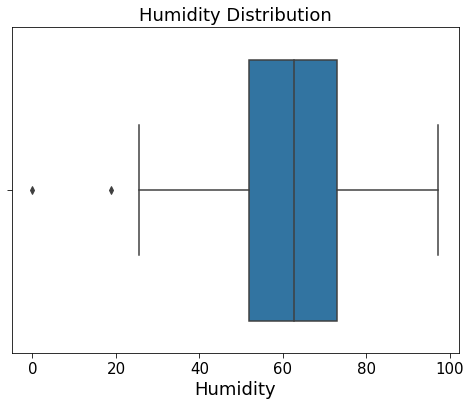

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(bike["hum"])
plt.title("Humidity Distribution",fontsize=18)
plt.xlabel("Humidity",fontsize=18)
plt.tick_params(size=5,labelsize = 15)

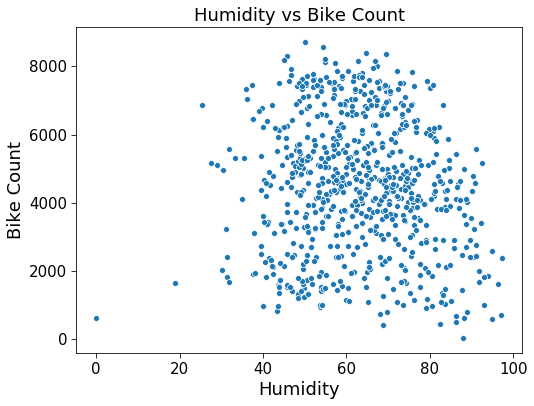

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="hum",y="cnt",data=bike) # Draw scatter plot
plt.title("Humidity vs Bike Count",fontsize=18) # title
plt.xlabel("Humidity",fontsize=18) # X axis label
plt.ylabel("Bike Count",fontsize=18) # Y axis label
plt.tick_params(size=5,labelsize = 15)

- __Humidity Increases means bike share increases.__

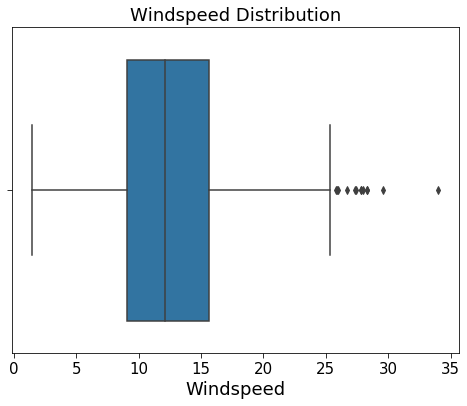

In [37]:
#Check distribution of Windspeed
plt.figure(figsize=(8,6))
sns.boxplot(bike["windspeed"])
plt.title("Windspeed Distribution",fontsize=18)
plt.xlabel("Windspeed",fontsize=18)
plt.tick_params(size=5,labelsize = 15)

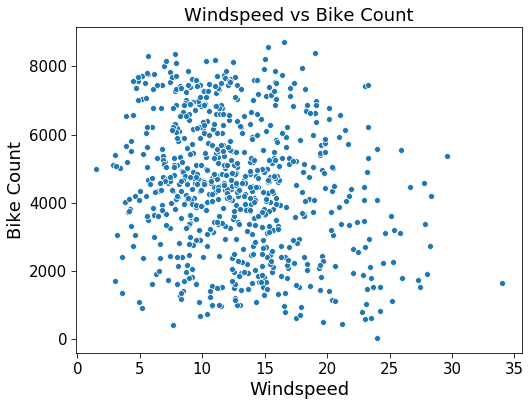

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="windspeed",y="cnt",data=bike)
plt.title("Windspeed vs Bike Count",fontsize=18)
plt.xlabel("Windspeed",fontsize=18)
plt.ylabel("Bike Count",fontsize=18)
plt.tick_params(size=5,labelsize = 15)

- __Windspeed increases means Bike share decreases.__

In [39]:
# Bin the Winspeed with Low, medium and High 
bike["windspeed_bin"] = pd.qcut(bike["windspeed"],q=3,labels=["low","medium","high"])

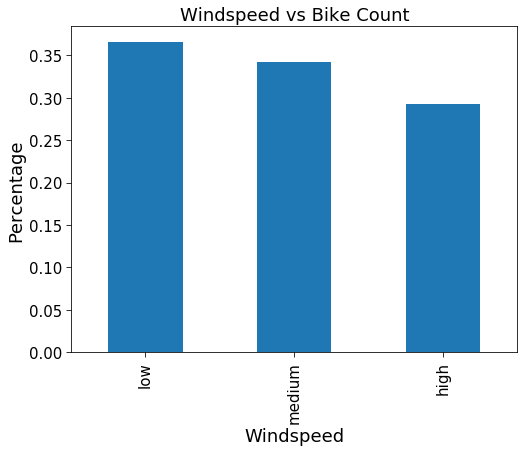

In [40]:
windspeed_bike_count = bike.groupby("windspeed_bin")["cnt"].sum()/bike["cnt"].sum() # Calculate percentages
plt.figure(figsize=(8,6))
windspeed_bike_count.plot.bar()  # Plot Bar_plot
plt.title("Windspeed vs Bike Count",fontsize=18)
plt.xlabel("Windspeed",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes

- __Windspeed increases, Bike sharing decreases.__

In [41]:
# Draw the pair plot.
# plt.figure(figsize=(20,20))
# sns.pairplot(bike)
# plt.tick_params(size=5,labelsize = 13)

##  Create Dummy variables for all categorical data

In [42]:
# First drop the binning columns which we have used for EDA
bike.drop(columns=["windspeed_bin","temp_bin"],inplace=True,axis=1)

In [43]:
# Check the data types 
print(bike.dtypes) 
# Crate One-Hot encoding of categorical columns and Drop the 1st column of each onehot column
bike_dummy = pd.get_dummies(bike,drop_first=True,columns=["season","yr","mnth","holiday","weekday","workingday","weathersit"])


season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object


In [44]:
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   hum           730 non-null    float64
 2   windspeed     730 non-null    float64
 3   cnt           730 non-null    int64  
 4   season_2      730 non-null    uint8  
 5   season_3      730 non-null    uint8  
 6   season_4      730 non-null    uint8  
 7   yr_1          730 non-null    uint8  
 8   mnth_2        730 non-null    uint8  
 9   mnth_3        730 non-null    uint8  
 10  mnth_4        730 non-null    uint8  
 11  mnth_5        730 non-null    uint8  
 12  mnth_6        730 non-null    uint8  
 13  mnth_7        730 non-null    uint8  
 14  mnth_8        730 non-null    uint8  
 15  mnth_9        730 non-null    uint8  
 16  mnth_10       730 non-null    uint8  
 17  mnth_11       730 non-null    uint8  
 18  mnth_12       730 non-null    

- __Total 29 columns has been created.__

## Divide Data into train and test set

In [45]:
bike_dummy.columns #shows all the columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [46]:
#load the library for train test split
from sklearn.model_selection import train_test_split

In [47]:
#convert dataset into train & test data
bike_train,bike_test = train_test_split(bike_dummy,test_size = 0.3,random_state=42)

## Scaling of features
- Apply scaling to numeric columns ,
- leave dummy variables columns as it is ( No scaling)
- scale the dependent variable as well.


In [48]:
#load the scaling library
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [49]:
# Scale only the numeric columns, Ignore the One hot columns
numeric_columns = ["temp","hum","windspeed","cnt"]
minmax_scale = MinMaxScaler() # use of minmax normalization 
bike_train[numeric_columns] = minmax_scale.fit_transform(bike_train[numeric_columns] )

In [50]:
bike_train.head()

temp       hum  windspeed       cnt  season_2  season_3  season_4  \
683  0.327133  0.639330   0.327101  0.605336         0         0         1   
645  0.403972  0.731215   0.419004  0.609320         0         0         1   
163  0.717562  0.509660   0.708724  0.554026         1         0         0   
360  0.331287  0.785745   0.415925  0.088253         0         0         0   
640  0.745598  0.817947   0.110593  0.862127         0         0         1   

     yr_1  mnth_2  mnth_3  ...  holiday_1  weekday_1  weekday_2  weekday_3  \
683     1       0       0  ...          0          0          0          0   
645     1       0       0  ...          1          1          0          0   
163     0       0       0  ...          0          1          0          0   
360     0       0       0  ...          0          0          1          0   
640     1       0       0  ...          0          0          0          1   

     weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  
683          1          0          0             1             1             0  
645          0          0          0             0             1             0  
163          0          0          0             1             0             0  
360          0          0          0             1             1             0  
640          0          0          0             1             1             0  

[5 rows x 29 columns]

In [51]:
bike_train.describe() #Check the basic statistics after scaling

temp         hum   windspeed         cnt    season_2    season_3  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.550874    0.654174    0.414873    0.497640    0.258317    0.260274   
std      0.227231    0.143648    0.185619    0.234026    0.438138    0.439214   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.354221    0.544598    0.281934    0.344984    0.000000    0.000000   
50%      0.575304    0.659940    0.384732    0.502113    0.000000    0.000000   
75%      0.745079    0.756977    0.526481    0.676868    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         season_4        yr_1      mnth_2      mnth_3  ...   holiday_1  \
count  511.000000  511.000000  511.000000  511.000000  ...  511.000000   
mean     0.250489    0.520548    0.074364    0.062622  ...    0.027397   
std      0.433719    0.500067    0.262619    0.242520  ...    0.163398   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    1.000000    0.000000    0.000000  ...    0.000000   
75%      0.500000    1.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

        weekday_1   weekday_2   weekday_3   weekday_4   weekday_5   weekday_6  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.148728    0.131115    0.140900    0.146771    0.129159    0.150685   
std      0.356169    0.337857    0.348259    0.354224    0.335704    0.358092   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       workingday_1  weathersit_2  weathersit_3  
count    511.000000    511.000000    511.000000  
mean       0.669276      0.346380      0.029354  
std        0.470935      0.476282      0.168963  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.000000  
75%        1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 29 columns]

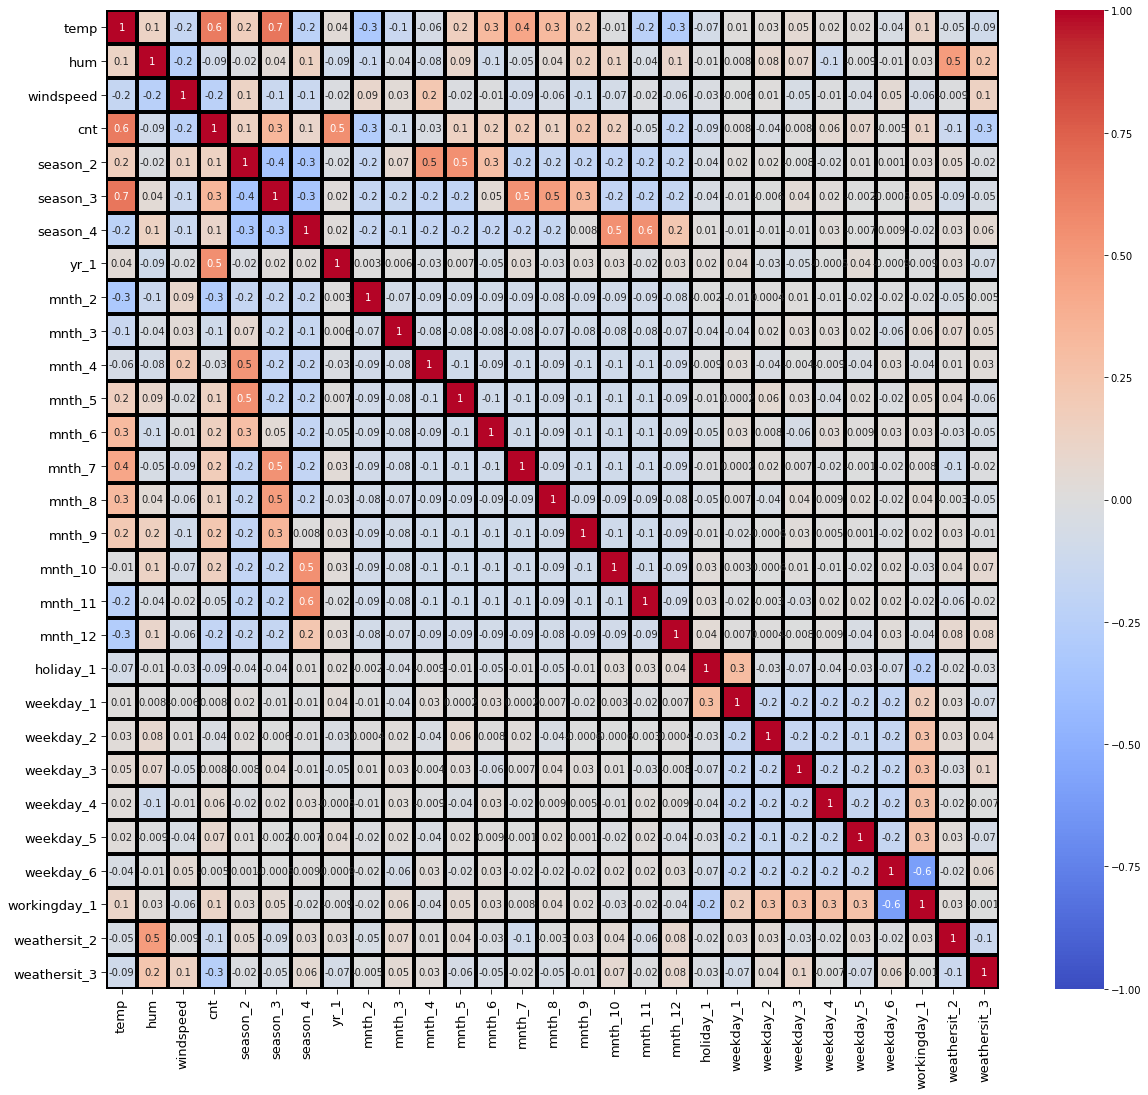

In [52]:
#Plot the heat map to check correlation in training set 
plt.figure(figsize=(20,18))
sns.heatmap(bike_train.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')
plt.tick_params(size=5,labelsize = 13)

 -  __cnt is +vely correlated with temp.__
 -  __cnt is +vely correlated with yr.__
 

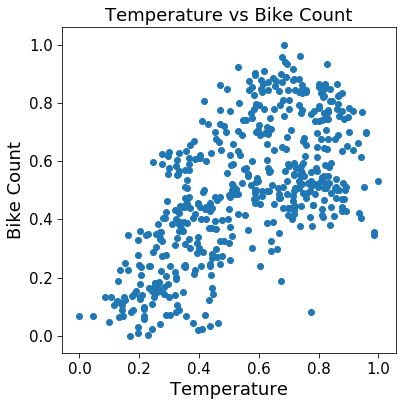

In [53]:
#check the relation among Bike count and Temperature in trainign data
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.title("Temperature vs Bike Count",fontsize=18)
plt.xlabel("Temperature",fontsize=18)
plt.ylabel("Bike Count",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.show()

## Divide training data to X and y 

In [54]:
# Create y- target column
y_train = bike_train.pop("cnt")
#Create Input data X
X_train = bike_train

In [55]:
#Load library for Linear Regression and Recurisive Feature Ellimination 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [56]:
# reduce 29 columns to 14 columns to simplify the model via RFE
estimator = LinearRegression() # Instantiate LinearRegression class
estimator.fit(X_train,y_train) # Fit training set input columns and target columns
rfe = RFE(estimator,n_features_to_select=14,step=1) # Instantiate RFE 
rfe = rfe.fit(X_train, y_train) # Fit the RFE 

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # Combine Column, Support and Columns ranking in RFE

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 14),
 ('mnth_5', False, 6),
 ('mnth_6', False, 12),
 ('mnth_7', False, 5),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 3),
 ('mnth_12', False, 4),
 ('holiday_1', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 7),
 ('weekday_3', False, 15),
 ('weekday_4', False, 13),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1),
 ('workingday_1', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [58]:
print(f"Columns whihc are relevant after RFE:-\n { X_train.columns[rfe.support_]}")

Columns whihc are relevant after RFE:-
 Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')


In [59]:
print(f"Columns which are not relevant after RFE:-\n { X_train.columns[~rfe.support_]}")

Columns which are not relevant after RFE:-
 Index(['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'workingday_1'],
      dtype='object')


In [60]:
relevant_columns = X_train.columns[rfe.support_] # Populate the Releveant columns after RFE

In [61]:
# Create relevant data and columns for to train our model
X_train_rfe = X_train[relevant_columns] 
X_train_rfe.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

## Build model using statsmodel

In [62]:
import statsmodels.api as sm

In [63]:
# Add constant to the columns as statsmodel does not consider C in Y=MX+C
X_train_rfe = sm.add_constant(X_train_rfe)
print(X_train_rfe.columns)
# "const" column is added to our relevant columns.

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_3', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [64]:
#Fit the model with training data and create Version-1 Model
linear_model_v1 = sm.OLS(y_train,X_train_rfe).fit()

In [65]:
#Inspect the summary statistics
linear_model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.65e-186
Time:                        23:24:09   Log-Likelihood:                 484.59
No. Observations:                 511   AIC:                            -939.2
Df Residuals:                     496   BIC:                            -875.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1740      0.031      5.565      0.000       0.113       0.235
temp             0.4637      0.036     12.978      0.000       0.393       0.534
hum             -0.1675      0.040     -4.191      0.000      -0.246      -0.089
windspeed       -0.1293      0.025     -5.178      0.000      -0.178      -0.080
season_2         0.1642      0.017      9.746      0.000       0.131       0.197
season_3         0.1107      0.022      4.926      0.000       0.067       0.155
season_4         0.1782      0.015     11.783      0.000       0.148       0.208
yr_1             0.2353      0.009     27.509      0.000       0.218       0.252
mnth_3           0.0531      0.018      2.896      0.004       0.017       0.089
mnth_9           0.1047      0.016      6.483      0.000       0.073       0.136
mnth_10          0.0801      0.018      4.377      0.000       0.044       0.116
holiday_1       -0.0813      0.026     -3.117      0.002      -0.132      -0.030
weekday_6        0.0145      0.012      1.217      0.224      -0.009       0.038
weathersit_2    -0.0578      0.011     -5.216      0.000      -0.080      -0.036
weathersit_3    -0.2291      0.028     -8.095      0.000      -0.285      -0.174
==============================================================================
Omnibus:                       91.150   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.487
Skew:                          -0.963   Prob(JB):                     9.66e-43
Kurtosis:                       5.319   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observation :
- __Trained the 1st version of model with 14 columns which are by product of RFE.__
- __Adj. R-squared:	0.835.__
- __p-value of all variables are 0, except__
    -  __month_12 which is 0.001.__
- __Now dropping mnth_12 .__

In [66]:
# X_train_v2 = X_train_rfe.drop(columns=["mnth_12"],axis=1)
X_train_v2 = X_train_rfe.drop(columns=["weekday_6"],axis=1)

In [67]:
X_train_v2.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_3', 'mnth_9', 'mnth_10', 'holiday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [68]:
X_train_v2 = sm.add_constant(X_train_v2)
linear_model_v2 = sm.OLS(y_train,X_train_v2).fit()
linear_model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.39e-187
Time:                        23:24:09   Log-Likelihood:                 483.83
No. Observations:                 511   AIC:                            -939.7
Df Residuals:                     497   BIC:                            -880.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1771      0.031      5.681      0.000       0.116       0.238
temp             0.4601      0.036     12.915      0.000       0.390       0.530
hum             -0.1677      0.040     -4.193      0.000      -0.246      -0.089
windspeed       -0.1285      0.025     -5.144      0.000      -0.178      -0.079
season_2         0.1653      0.017      9.822      0.000       0.132       0.198
season_3         0.1125      0.022      5.014      0.000       0.068       0.157
season_4         0.1785      0.015     11.801      0.000       0.149       0.208
yr_1             0.2354      0.009     27.508      0.000       0.219       0.252
mnth_3           0.0516      0.018      2.820      0.005       0.016       0.088
mnth_9           0.1044      0.016      6.462      0.000       0.073       0.136
mnth_10          0.0809      0.018      4.422      0.000       0.045       0.117
holiday_1       -0.0836      0.026     -3.214      0.001      -0.135      -0.032
weathersit_2    -0.0580      0.011     -5.225      0.000      -0.080      -0.036
weathersit_3    -0.2278      0.028     -8.049      0.000      -0.283      -0.172
==============================================================================
Omnibus:                       87.810   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.388
Skew:                          -0.935   Prob(JB):                     9.13e-41
Kurtosis:                       5.273   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observation :
- __Trained the 2nd version of model with 13 columns.__
- __Adj. R-squared:	0.827.__
- __p-value of all variables are 0, except__
    -  __mnth_11 which is 0.002.__
- __Now dropping mnth_11 .__

In [69]:
# X_train_v3 = X_train_v2.drop(columns=["mnth_11"],axis=1)
X_train_v3 = X_train_v2.drop(columns=["mnth_3"],axis=1)

In [70]:
X_train_v3.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_9', 'mnth_10', 'holiday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [71]:
#Check the VIF  for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X = X_train_v3

vif["features"] = X.columns

vif["VIF"] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

In [72]:
vif

features    VIF
0          const  53.62
1           temp   3.68
2            hum   1.85
3      windspeed   1.21
4       season_2   3.02
5       season_3   5.30
6       season_4   2.30
7           yr_1   1.03
8         mnth_9   1.20
9        mnth_10   1.55
10     holiday_1   1.01
11  weathersit_2   1.56
12  weathersit_3   1.28

In [73]:
X_train_v4 = X_train_v3.drop(['const'], axis=1)

In [74]:
X_train_v4 = sm.add_constant(X_train_v4)
linear_model_v4 = sm.OLS(y_train,X_train_v4).fit()
linear_model_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.16e-187
Time:                        23:24:09   Log-Likelihood:                 479.77
No. Observations:                 511   AIC:                            -933.5
Df Residuals:                     498   BIC:                            -878.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1900      0.031      6.119      0.000       0.129       0.251
temp             0.4644      0.036     12.958      0.000       0.394       0.535
hum             -0.1753      0.040     -4.364      0.000      -0.254      -0.096
windspeed       -0.1324      0.025     -5.274      0.000      -0.182      -0.083
season_2         0.1599      0.017      9.497      0.000       0.127       0.193
season_3         0.1017      0.022      4.568      0.000       0.058       0.145
season_4         0.1691      0.015     11.382      0.000       0.140       0.198
yr_1             0.2355      0.009     27.334      0.000       0.219       0.252
mnth_9           0.1045      0.016      6.426      0.000       0.073       0.136
mnth_10          0.0804      0.018      4.364      0.000       0.044       0.117
holiday_1       -0.0879      0.026     -3.362      0.001      -0.139      -0.037
weathersit_2    -0.0550      0.011     -4.946      0.000      -0.077      -0.033
weathersit_3    -0.2206      0.028     -7.773      0.000      -0.276      -0.165
==============================================================================
Omnibus:                       82.512   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.406
Skew:                          -0.880   Prob(JB):                     1.34e-38
Kurtosis:                       5.256   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# X_train_v4 = X_train_v4.drop(columns=["season_3"],axis=1)
X_train_v4 = X_train_v4.drop(columns=["holiday_1"],axis=1)
X_train_v4.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [76]:
vif = pd.DataFrame()

X = X_train_v4

vif["features"] = X.columns

vif["VIF"] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif

features    VIF
0          const  53.47
1           temp   3.68
2            hum   1.85
3      windspeed   1.20
4       season_2   3.02
5       season_3   5.30
6       season_4   2.30
7           yr_1   1.03
8         mnth_9   1.20
9        mnth_10   1.54
10  weathersit_2   1.55
11  weathersit_3   1.27

In [77]:
X_train_v5 = X_train_v4.drop(columns=["const"],axis=1)

In [78]:
X_train_v5.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [79]:
X_train_v5 = sm.add_constant(X_train_v5)
linear_model_v5 = sm.OLS(y_train,X_train_v5).fit()
linear_model_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.39e-185
Time:                        23:24:10   Log-Likelihood:                 474.04
No. Observations:                 511   AIC:                            -924.1
Df Residuals:                     499   BIC:                            -873.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1845      0.031      5.890      0.000       0.123       0.246
temp             0.4676      0.036     12.917      0.000       0.396       0.539
hum             -0.1776      0.041     -4.375      0.000      -0.257      -0.098
windspeed       -0.1298      0.025     -5.119      0.000      -0.180      -0.080
season_2         0.1621      0.017      9.537      0.000       0.129       0.196
season_3         0.1038      0.022      4.620      0.000       0.060       0.148
season_4         0.1714      0.015     11.434      0.000       0.142       0.201
yr_1             0.2350      0.009     26.999      0.000       0.218       0.252
mnth_9           0.1041      0.016      6.336      0.000       0.072       0.136
mnth_10          0.0782      0.019      4.205      0.000       0.042       0.115
weathersit_2    -0.0537      0.011     -4.782      0.000      -0.076      -0.032
weathersit_3    -0.2170      0.029     -7.574      0.000      -0.273      -0.161
==============================================================================
Omnibus:                       89.964   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.136
Skew:                          -0.953   Prob(JB):                     5.16e-42
Kurtosis:                       5.301   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()

X = X_train_v5

vif["features"] = X.columns

vif["VIF"] = [ variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif

features    VIF
0          const  53.47
1           temp   3.68
2            hum   1.85
3      windspeed   1.20
4       season_2   3.02
5       season_3   5.30
6       season_4   2.30
7           yr_1   1.03
8         mnth_9   1.20
9        mnth_10   1.54
10  weathersit_2   1.55
11  weathersit_3   1.27

In [81]:
#Final columns are 
X_train_final = X_train_v5.drop(columns=["const"],axis=1)
cols = X_train_final.columns

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
est = model.fit(X_train_final,y_train)
y_sk_train_pred = est.predict(X_train_final)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_train, y_sk_train_pred)

0.8324726354364966

## Residual Analsysi on train data

In [84]:
y_train_predict_bike_count = linear_model_v5.predict(X_train_v5)


In [85]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict_bike_count)

0.8324726354364965

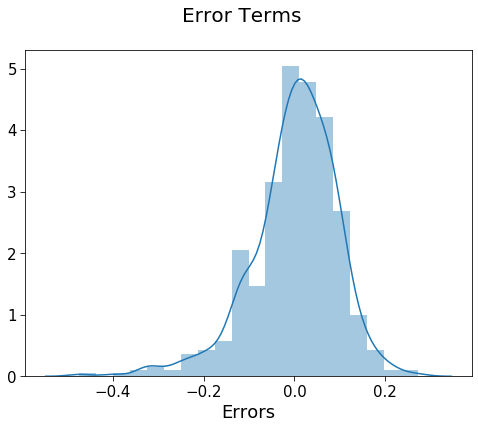

In [86]:
fig = plt.figure(figsize=(8,6))
sns.distplot((y_train - y_train_predict_bike_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.tick_params(size=5,labelsize = 15)

## Making predictions

### Apply scaling on test datset

In [87]:
print(numeric_columns)

['temp', 'hum', 'windspeed', 'cnt']


In [88]:
bike_test.head()

temp      hum  windspeed   cnt  season_2  season_3  season_4  yr_1  \
468  20.295000  50.2917  12.791439  7460         1         0         0     1   
148  27.367500  81.8750  14.333846  4788         1         0         0     0   
302  13.085847  62.3750  11.833339  3331         0         0         1     0   
355  17.356653  75.7500   3.167425  3068         0         0         0     0   
515  27.880000  49.2917  13.083693  7338         1         0         0     1   

     mnth_2  mnth_3  ...  holiday_1  weekday_1  weekday_2  weekday_3  \
468       0       0  ...          0          0          0          0   
148       0       0  ...          0          0          0          0   
302       0       0  ...          0          0          0          0   
355       0       0  ...          0          0          0          0   
515       0       0  ...          0          0          0          0   

     weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  
468          0          0          1             0             0             0  
148          0          0          0             0             0             0  
302          0          0          0             0             0             0  
355          1          0          0             1             1             0  
515          1          0          0             1             0             0  

[5 rows x 29 columns]

In [89]:
bike_test[numeric_columns] = minmax_scale.transform(bike_test[numeric_columns])
bike_test.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [90]:
bike_test.head()

temp       hum  windspeed       cnt  season_2  season_3  season_4  \
468  0.543115  0.518248   0.422104  0.848606         1         0         0   
148  0.758058  0.843709   0.479765  0.526017         1         0         0   
302  0.324018  0.642765   0.386287  0.350115         0         0         1   
355  0.453814  0.780592   0.062325  0.318363         0         0         0   
515  0.773634  0.507943   0.433030  0.833877         1         0         0   

     yr_1  mnth_2  mnth_3  ...  holiday_1  weekday_1  weekday_2  weekday_3  \
468     1       0       0  ...          0          0          0          0   
148     0       0       0  ...          0          0          0          0   
302     0       0       0  ...          0          0          0          0   
355     0       0       0  ...          0          0          0          0   
515     1       0       0  ...          0          0          0          0   

     weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  
468          0          0          1             0             0             0  
148          0          0          0             0             0             0  
302          0          0          0             0             0             0  
355          1          0          0             1             1             0  
515          1          0          0             1             0             0  

[5 rows x 29 columns]

In [91]:
y_test = bike_test.pop("cnt")
X_test = bike_test

In [92]:
X_test_relevant = X_test[cols]
# X_sk_test_fianl = X_test_relevant
print(X_test_relevant.columns)
print("----------------------------------------------------")
X_test_relevant = sm.add_constant(X_test_relevant)
print("After Adding const-->",X_test_relevant.columns)

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')
----------------------------------------------------
After Adding const--> Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [93]:
y_test_predict_bike_count = linear_model_v5.predict(X_test_relevant)

In [94]:
# y_sk_test_pred = est.predict(X_sk_test_fianl)
# r2_score(y_test, y_sk_test_pred)

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predict_bike_count)

0.8257044306564506

Text(0, 0.5, 'y_pred')

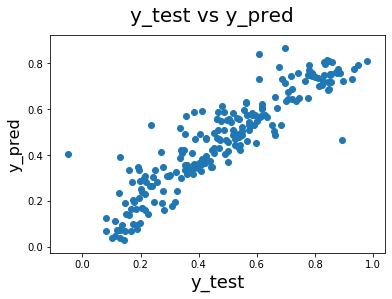

In [96]:
fig = plt.figure()
plt.scatter(y_test,y_test_predict_bike_count)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)